<div style="text-align: right"> Karina Chiñas Fuentes </div>
<div style="text-align: right"> Matrikelnummer: 3578458 </div>
<div style="text-align: right"> 30/11/21 </div>

# Vorlesung Plasmaphysik I


### Particles in the Earth's magnetic field.

Code based on [Scipython](https://scipython.com/blog/visualizing-the-earths-magnetic-field/).

In [1]:
import numpy as np
import sympy as sp
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

sp.init_printing(use_unicode=True)

 Visualizing the Earth's dipolar magnetic field. 
 
 $$
     \vec{B} = -2c_B\frac{R^3_E}{r^3}\sin(\theta)\hat{r} + c_B\frac{R^3_E}{r^3}\cos(\theta)\hat{\theta}
 $$
 
For the grid:
 
 $$
     r = \sqrt{x^2+y^2}
 $$
 
 $$
     \theta = \arctan(y/x)
 $$

In [2]:
# setting constants

α  = np.radians(9.6) # Deviation of magnetic pole frome axis 
RE = 6.370   # x10^6 m
CB = 3.12e-5 # T
L  = 26      # x10^6 m Outer Van-Allen belt
l  = 3.7     # x10^6 m Inner Van-Allen belt

In [3]:
# Construction of magnetic field

def B(r,θ):
    """
    Defines Earth's magnetic field in spherical coordinates.
    Returns each component in a form of tuple.
    """
    Br = -2*CB*((RE/r)**3)*np.sin(θ+α)
    Bθ =    CB*((RE/r)**3)*np.cos(θ+α)
    return (Br,Bθ)

In [4]:
# Construction of grid

nx,ny = 64,64
x_max, y_max = 40,40

x = np.linspace(-x_max,x_max,nx)
y = np.linspace(-y_max,y_max,ny)

mesh_x,mesh_y = np.meshgrid(x,y)
r,θ = np.hypot(mesh_x,mesh_y), np.arctan2(mesh_y,mesh_x)

In [5]:
# Getting the components of the magnetic field

Br,Bθ = B(r,θ)

In [6]:
# Transforming results to cartesian coordinates 

cosβ,sinβ = np.cos(θ+np.pi), np.sin(θ+np.pi)
Bx  = -Bθ*sinβ + Br*cosβ
By  =  Bθ*cosβ + Br*sinβ

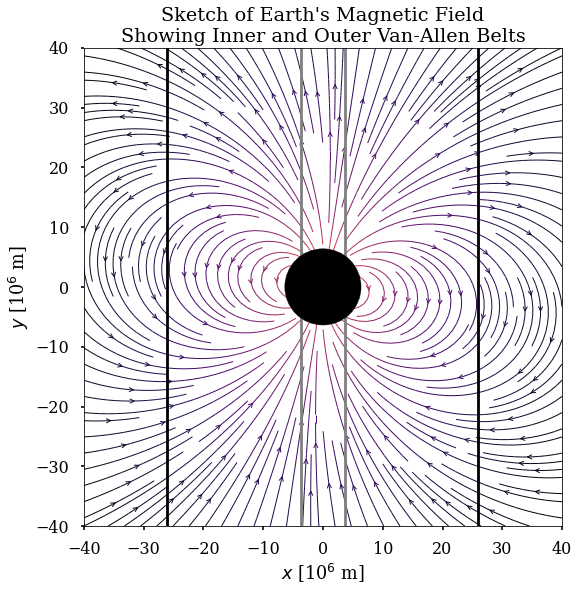

In [7]:
# Plotting the results

fig, ax = plt.subplots()

# streamlines - Magnetic field
color = 2*np.log(np.hypot(Bx,By))
ax.streamplot(x,y,Bx,By, 
              color=color, 
              linewidth=1,
              cmap=plt.cm.inferno, 
              density=2,
              arrowstyle='->',
              arrowsize=1)
# Earth representation
ax.add_patch(Circle((0,0), 
                    radius=RE, 
                    color='black', 
                    zorder=100))
ax.set_title('Sketch of Earth\'s Magnetic Field\nShowing Inner and Outer Van-Allen Belts')
ax.set_xlabel('$x$ [10$^6$ m]')
ax.set_ylabel('$y$ [10$^6$ m]')
ax.set_xlim(-x_max, x_max)
ax.set_ylim(-y_max, y_max)
ax.axvline(x=L,  ymin=-y_max, ymax=y_max, color='k')
ax.axvline(x=-L, ymin=-y_max, ymax=y_max, color='k')
ax.axvline(x=l,  ymin=-y_max, ymax=y_max, color='gray')
ax.axvline(x=-l, ymin=-y_max, ymax=y_max, color='gray')
ax.set_aspect('equal')

fig.savefig('EarthsMagneticField.pdf')

plt.show()